In [1]:
import numpy as np
import matplotlib.pyplot as plt
import examples

# Simple Linear Regression

**Linear regression** attempts to model the relationship between two variables ($x$ and $y$) by fitting a linear equation $y = \theta_1 x+\theta_0$ to observed data.
One variable is considered to be an explanatory variable ($x)$, and the other is considered to be a dependent variable ($y$). 
Linear regression is used to predict values within a continuous range, (e.g. sales, price)

**Table of Contents**

- [A Toy Example](#1.-A-First-Example)
- [The Mean Squared Error](#2.-The-Mean-Squared-Error)
- [Minimizing the MSE: The Normal Equations](#3.-Minimizing-the-MSE:-The-Normal-Equations)
- [Making Predictions](#4.-Making-Predictions)
- [Example: The World Happiness Report](#5.-Example:-The-World-Happiness-Report)

## 1. A Toy Example

The following cell generates (and plots) a linear-looking dataset

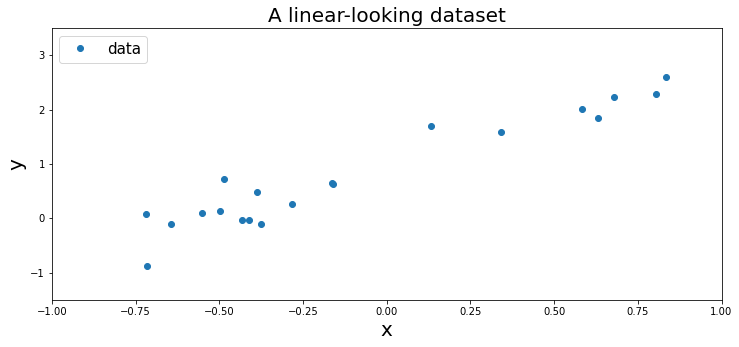

In [2]:
'generate and plot a linear-looking dataset'
m = 20 # number of points
x = -1 + 2*np.random.rand(m) # m random points over the interval [-1,1]
y = 2*x+1+0.25*np.random.randn(m) # y = 2x+1 + random noise
plt.figure(figsize=(12,5)) 
plt.plot(x,y,'o', label='data')
plt.xlim([-1,1])
plt.ylim([-1.5,3.5])
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.title('A linear-looking dataset',fontsize=20)
plt.legend(fontsize=15, loc='upper left')

The plot shows that the two variables $x$ and $y$ are roughly correlated: the larger $x$ is, the larger $y$ is. We can quantify this by attempting to fit a linear model

$$
y = \theta_1 x+\theta_0
$$

In order to find a good linear model for our data, we need a measure of how well (or poorly) a model fits the data. The most common performance measure is the **Mean Squared Error** (MSE):

$$
\mathrm{MSE} = \frac{1}{m}\sum_{i=1}^m\left(y_i - (\theta_1 x_i+\theta_0) \right)^2
$$


The cell below displays the MSE of a linear model. 
You can change interactively the slope ($\theta_1$) and the bias ($\theta_0$) of the model.

In [3]:
from examples import interactive_example
interactive_example(x,y)

interactive(children=(FloatText(value=-1.0, description='theta1 (slope)', step=0.1), FloatText(value=0.0, desc…

## 2. The Mean Squared Error

Using **Linear Algebra** notation, the MSE can be written more concisely as

$$ 
\mathrm{MSE} = \frac{1}{m}\|y-X\theta\|_2^2
$$

where

$$
X = \begin{bmatrix}
1 & x_1\\
1 & x_2\\
\vdots & \vdots \\
1 & x_m
\end{bmatrix}, \quad
y = \begin{bmatrix}
y_1\\
y_2\\
\vdots\\
y_m
\end{bmatrix}, \quad \mbox{and} \quad
\theta = 
\begin{bmatrix}
\theta_0\\ \theta_1
\end{bmatrix}.
$$

The matrix $X$ is called the **feature matrix** and the vector $y$ is called the **target vector**. 
The vector $\theta$ contains the parameters of the linear model (the slope $\theta_1$ and the bias $\theta_0$).

In [4]:
'build feature matrix'
m = len(x)
X = np.ones((m,2))
X[:,1] = x

In [5]:
X

array([[ 1.        , -0.48563309],
       [ 1.        ,  0.67896499],
       [ 1.        , -0.41063106],
       [ 1.        , -0.71558572],
       [ 1.        , -0.64548993],
       [ 1.        ,  0.13254188],
       [ 1.        , -0.37530264],
       [ 1.        ,  0.80335136],
       [ 1.        ,  0.83346414],
       [ 1.        , -0.38868691],
       [ 1.        ,  0.63094747],
       [ 1.        , -0.71760947],
       [ 1.        , -0.4321186 ],
       [ 1.        , -0.15972172],
       [ 1.        , -0.16454522],
       [ 1.        , -0.49851945],
       [ 1.        , -0.55267924],
       [ 1.        ,  0.58357545],
       [ 1.        , -0.28153773],
       [ 1.        ,  0.34084529]])

The image below displays the MSE function for our toy dataset.

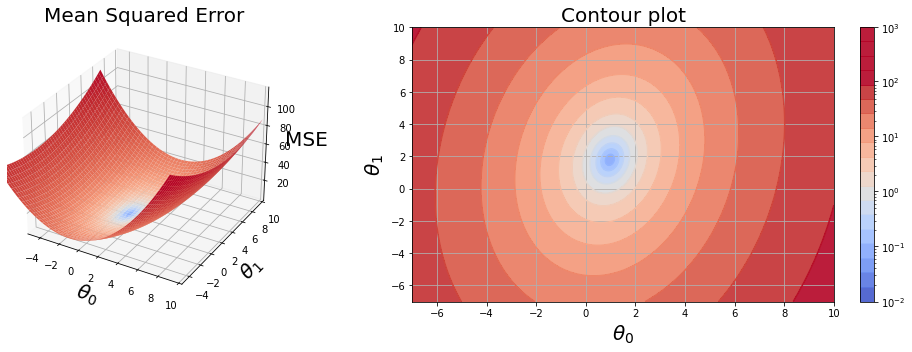

In [6]:
examples.plot_mse(x,y)

In [7]:
'MSE function implementation'
def MSE(X,y,theta):
    MSE = np.sum((y-X.dot(theta))**2)/m
    return MSE

In [8]:
'check that the MSE function works'
MSE(X,y,np.array([4,2]))

9.160297386029658

## 3. Minimizing the MSE: The Normal Equations

To find the line that best fits the datapoints, we need to find the parameters $\theta_0$, $\theta_1$ that minimizes the MSE 
cost function.

$$
\min_\theta \|y-X\theta\|_2^2.
$$

This is an example of a **least squares problem**. 
From Linear Algebra, we know that the (unique) vector $\theta$ that minimizes $\|y-X\theta\|_2^2$ satisfies the **normal equations**

$$
X^TX\, \theta = X^Ty.
$$

Numpy has a built-in function for solving linear systems $\tt numpy.linalg.solve$ ([referenge page](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html))

In [9]:
'best parameters'
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))
theta

array([0.96956133, 1.78839582])

In [10]:
'mean squared error'
MSE(X,y,theta)

0.0809972287189554

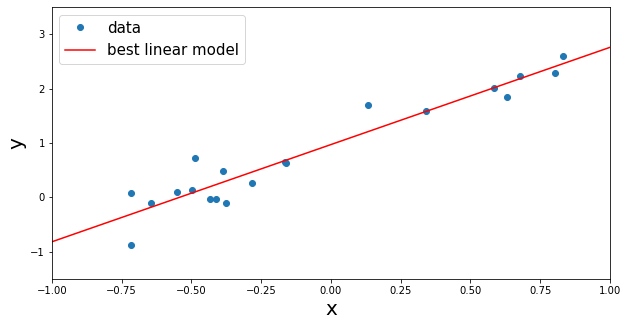

In [11]:
' plot datapoints + fitted line'
plt.figure(figsize=(10,5)) 

'plot datapoints'
plt.plot(x,y,'o', label='data')
plt.xlim([-1,1])
plt.ylim([-1.5,3.5])
plt.xlabel('x',fontsize=20)
plt.ylabel('y',fontsize=20)

'plot line'
m_plot = 100
x_plot = np.linspace(-1,1,m_plot)
X_plot = np.ones((m_plot,2))
X_plot[:,1] = x_plot
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r', label='best linear model')

plt.legend(fontsize=15, loc='upper left')

## 4. Making Predictions

We can now predict the output $y_{\rm new}$ of a new inmput feature $x_{\rm new}$ by simply plugging the new input into the tuned linear model:

$$
y_{\rm new} = \theta_1 x_{\rm new} + \theta_0
$$

In [12]:
from examples import interactive_prediction
interactive_prediction(x,y)

interactive(children=(FloatSlider(value=0.0, description='new point', max=1.5, min=-1.5), Output()), _dom_clas…

## 5. Example: The rise of student loan debt in the United States

In [14]:
import pandas as pd

In [21]:
'load the data'
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/student%20debt.csv'
data = pd.read_csv(url)
data.head()

,year,debt
0,2004.2,0.26
1,2004.5,0.26
2,2004.8,0.33
3,2005.0,0.35
4,2005.2,0.36


This dataset contains the total student loan debt, that is money borrowed by students to pay for college tuition, room and board, etc., held by citizens of the United States from 2006 to 2014, measured quarterly.

In [25]:
y = data['debt'].to_numpy()
x = data['year'].to_numpy()

Text(0, 0.5, 'student debt in trillions of dollars')

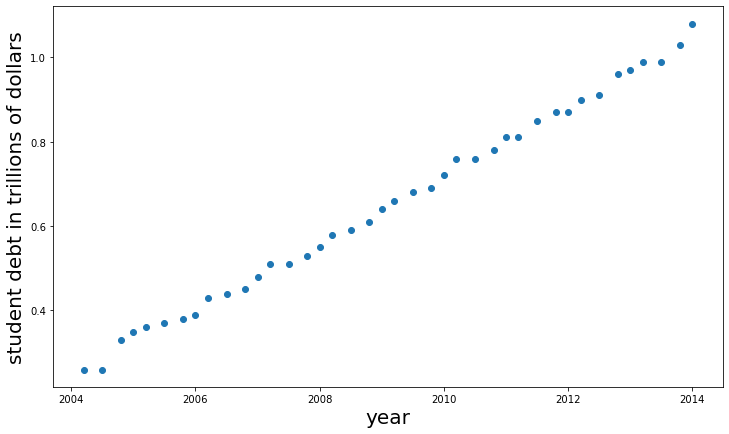

In [26]:
'plot Happiness_Score against GDP_per_Capita'
plt.figure(figsize=(12,7))
plt.plot(x,y,'o')
plt.xlabel('year',fontsize=20)
plt.ylabel('student debt in trillions of dollars',fontsize=20)

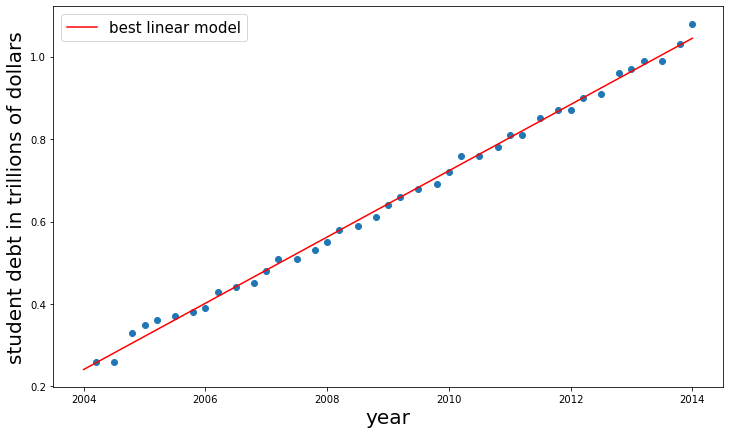

In [28]:
'build feature matrix'
m = len(x)
X = np.ones((m,2))
X[:,1] = x

'fit a line to the model'
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))

'plot datapoints'
plt.figure(figsize=(12,7))
plt.plot(x,y,'o')
plt.xlabel('year',fontsize=20)
plt.ylabel('student debt in trillions of dollars',fontsize=20)

'plot line'
m_plot = 100
x_plot = np.linspace(2004,2014,m_plot)
X_plot = np.ones((m_plot,2))
X_plot[:,1] = x_plot
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,'r', label='best linear model')

plt.legend(fontsize=15, loc='upper left')

If this trend continues, we can use the regression line to predict that total student debt will
reach a total of two trillion dollars by the year 2026.

In [29]:
year = 2026
debt = year*theta[1]+theta[0]

In [30]:
debt

2.0082245449065397